# **Wiktor Ciołek LSED lab7 07.06.2024**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True

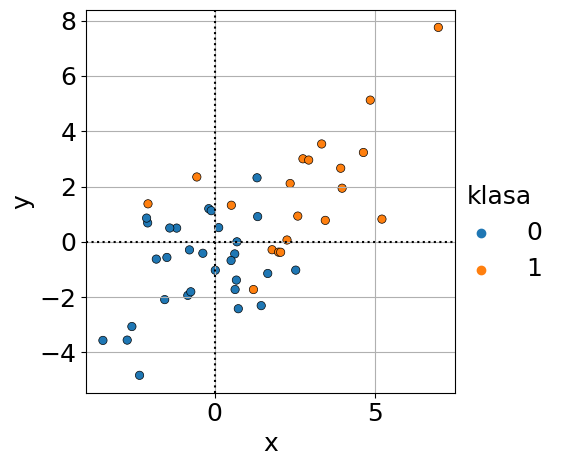

In [67]:
def draw_data(n1, n2, m1, m2, S1, S2):

    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)

    data = np.concatenate((data1, data2), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])

    data["klasa"] = np.repeat([0, 1], [n1, n2])
    
    return data

m1, m2 = [-1, -1], [2, 2]
S1 = [[4, 2], [2, 4]]
n1, n2 = 30, 20

np.random.seed(129)
data = draw_data(n1, n2, m1, m2, S1, S1)

g = sns.relplot(data, x=data.x, y=data.y, hue="klasa", edgecolor="k")
g.ax.spines['top'].set_visible(True)
g.ax.spines['right'].set_visible(True)

plt.axhline(0, color="black", linestyle=":")
plt.axvline(0, color="black", linestyle=":")
plt.show()


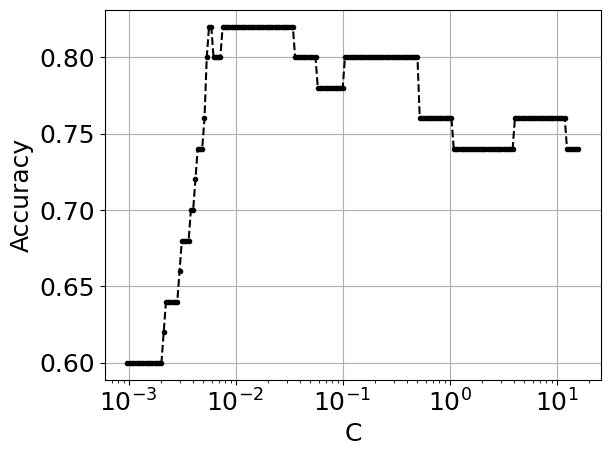

In [68]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

C = np.logspace(-10, 4, 200, base=2)

clf = svm.SVC(kernel = "linear")
clf_grid = GridSearchCV(clf, param_grid={'C': C})
clf_grid.fit(data[['x', 'y']], data.klasa)

scores = clf_grid.cv_results_['mean_test_score']
c_best = C[np.argmax(scores)]

plt.semilogx(clf_grid.cv_results_['param_C'], scores, 'ko--', markersize=3)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

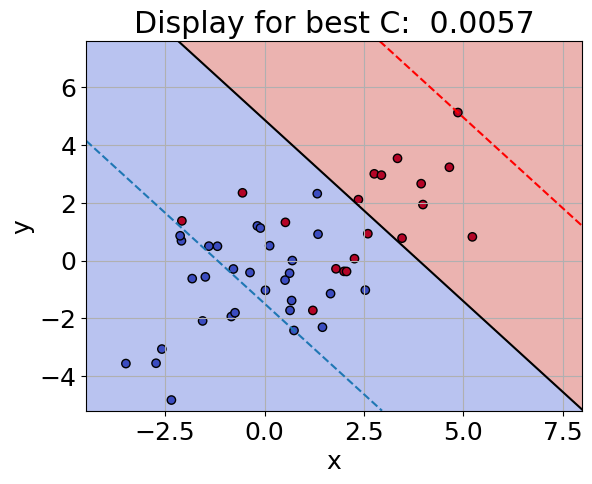

In [69]:
from sklearn.inspection import DecisionBoundaryDisplay

clf = svm.SVC(kernel = "linear", C = c_best)
clf.fit(data[["x", "y"]], data.klasa)

w = clf.coef_[0]
a = -w[0] / w[1]
b = clf.intercept_[0]

disp = DecisionBoundaryDisplay.from_estimator(clf, data[["x","y"]], response_method="predict", 
                                            alpha=0.4, cmap=plt.cm.coolwarm, grid_resolution=1000)
plt.scatter(data.x, data.y, c=data["klasa"], edgecolor="k", cmap=plt.cm.coolwarm)
plt.title(f'Display for best C:  {c_best:.4f}')

plt.axline((0, -b / w[1]), slope = a, c = "black")
plt.axline((0, (1 - b) / w[1]), slope = a, ls = "--", color = "red")
plt.axline((0, (-1 - b) / w[1]), slope = a, ls = "--")
plt.ylim(-5.2, 7.6)

plt.show()